## Import Python packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string

from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
import sklearn

from tabulate import tabulate

In [ ]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


## Download dataset

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"

## Assign column names

In [ ]:
headernames = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

## Read the dataset to pandas dataframe 

In [ ]:
dataset = pd.read_csv(path, names = headernames)
dataset.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## Data preprocessing 

### Checking for missing values

In [ ]:
dataset.isna().sum()

lettr    0
x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

### Number of occurences of the classes

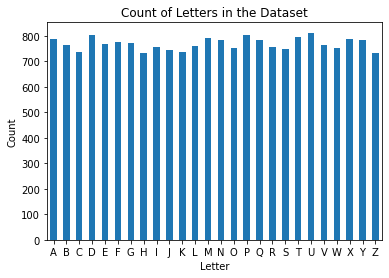

In [ ]:
dataset.groupby('lettr').size().plot.bar(
    rot=0, 
    title="Count of Letters in the Dataset",
    xlabel="Letter",
    ylabel="Count"
    )

# dataset.groupby('lettr').size()

### Correlation

In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap="Spectral", axis=None).set_precision(2)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
x-box,1.00,0.76,0.85,0.67,0.62,-0.03,0.05,0.01,0.05,0.15,0.04,-0.05,0.49,0.10,0.27,-0.11
y-box,0.76,1.00,0.67,0.82,0.56,0.05,-0.04,-0.03,0.10,0.16,-0.05,-0.01,0.27,-0.00,0.23,-0.04
width,0.85,0.67,1.00,0.66,0.77,0.06,0.02,-0.10,0.06,0.12,0.01,-0.05,0.56,0.05,0.26,-0.12
high,0.67,0.82,0.66,1.00,0.64,0.04,-0.02,0.08,0.06,0.01,-0.01,0.03,0.27,0.03,0.30,-0.02
onpix,0.62,0.56,0.77,0.64,1.00,0.14,-0.03,-0.01,-0.07,-0.07,-0.07,-0.04,0.63,0.02,0.49,-0.06
x-bar,-0.03,0.05,0.06,0.04,0.14,1.00,-0.36,-0.05,-0.12,0.09,-0.34,-0.03,0.14,-0.25,0.13,0.25
y-bar,0.05,-0.04,0.02,-0.02,-0.03,-0.36,1.00,-0.12,-0.05,0.18,0.60,-0.27,-0.04,0.56,-0.08,-0.21
x2bar,0.01,-0.03,-0.10,0.08,-0.01,-0.05,-0.12,1.00,-0.19,-0.32,0.04,0.08,0.14,-0.08,0.01,0.18
y2bar,0.05,0.10,0.06,0.06,-0.07,-0.12,-0.05,-0.19,1.00,0.13,-0.06,0.12,-0.38,-0.05,0.28,-0.06
xybar,0.15,0.16,0.12,0.01,-0.07,0.09,0.18,-0.32,0.13,1.00,0.06,-0.11,-0.18,0.03,-0.09,-0.11


## Split data into training and testing

In [ ]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print("Training data shape [(X), (Y)]: ",  X_train.shape, y_train.shape)
print("Testing data shape [(X), (Y)]: ",  X_test.shape, y_test.shape)


Training data shape [(X), (Y)]:  (16000, 16) (16000,)
Testing data shape [(X), (Y)]:  (4000, 16) (4000,)


## Train the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Make the prediction 

In [ ]:
y_pred = classifier.predict(X_test)
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)
print("Random Forest Classification")
print("Training Score: ", train_score)
print("Testing Score: ", test_score)

Random Forest Classification
Training Score:  1.0
Testing Score:  0.95875


## Print the results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       161
           B       0.91      0.94      0.92       156
           C       0.98      0.96      0.97       148
           D       0.93      0.95      0.94       161
           E       0.93      0.96      0.94       158
           F       0.96      0.93      0.94       171
           G       0.94      0.98      0.96       146
           H       0.94      0.87      0.90       153
           I       0.97      0.94      0.96       147
           J       0.94      0.96      0.95       139
           K       0.93      0.97      0.95       141
           L       0.98      0.98      0.98       145
           M       0.95      0.97      0.96       163
           N       0.99      0.96      0.98       144
           O       0.96      0.96      0.96       159
           P       0.95      0.94      0.95       157
           Q       0.96      0.97      0.96       152
    

## Display confusion matrix

In [ ]:
alphabet_string = string.ascii_uppercase
class_names = list(alphabet_string)

### With and without normalization

Normalized confusion matrix
[[0.99378882 0.         0.00621118 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.94230769 0.         0.         0.00641026 0.
  0.01282051 0.00641026 0.         0.         0.         0.
  0.         0.00641026 0.         0.         0.         0.00641026
  0.         0.         0.00641026 0.01282051 0.         0.
  0.         0.        ]
 [0.         0.         0.95945946 0.         0.00675676 0.
  0.01351351 0.         0.         0.         0.         0.
  0.         0.         0.01351351 0.         0.00675676 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.95031056 0.         0.
  0.         0.02484472 0.         0.         0.         0.
  0.         0.         0.00621118 0.         0. 

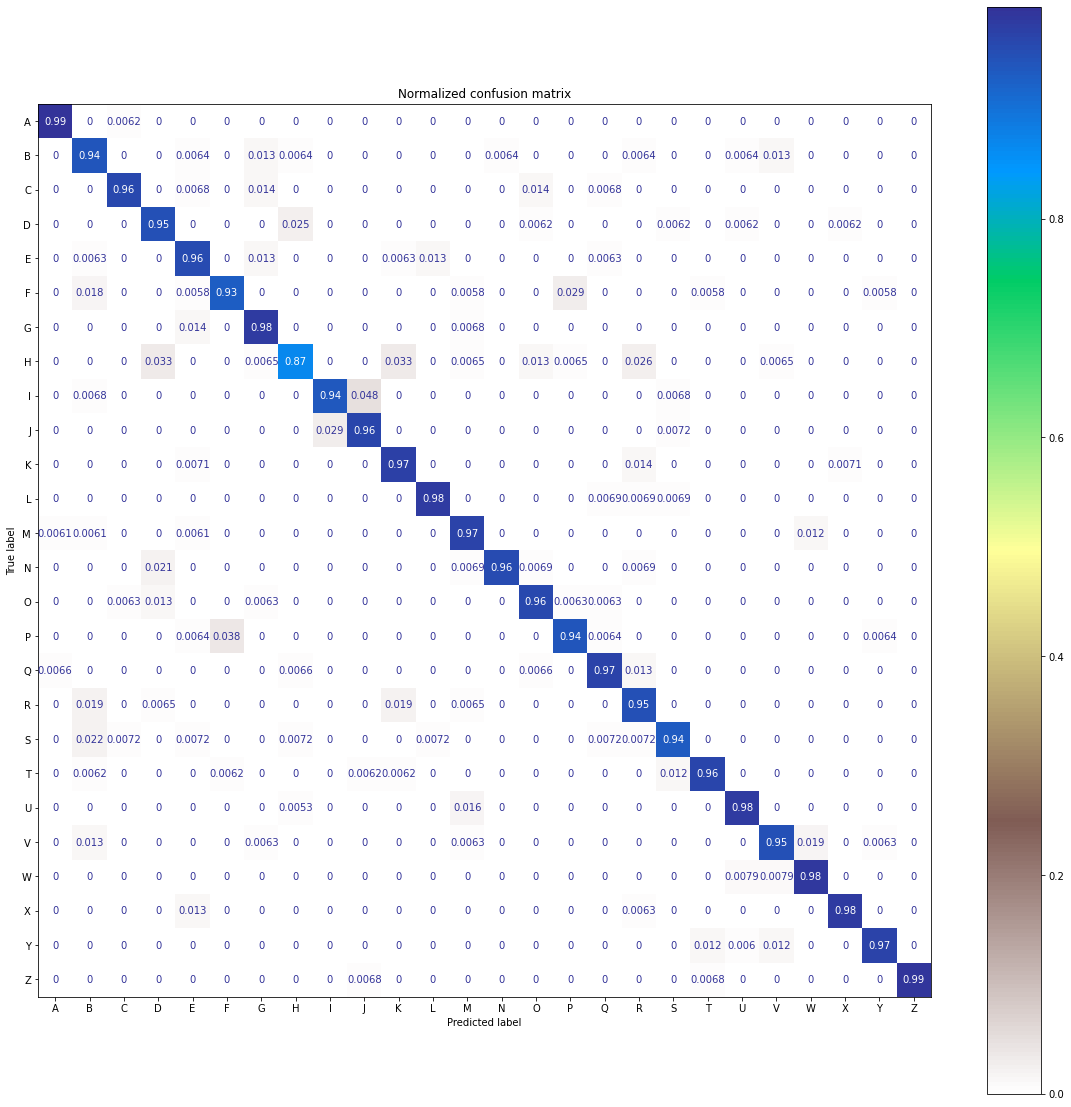

In [ ]:
# Plot non-normalized confusion matrix

fig, ax = plt.subplots(figsize=(20, 20))
ax.set(
    ylabel='True label',
    xlabel='Predicted label'
)

titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.terrain_r,
                                 normalize=normalize,
                                 ax=ax)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Without normalization

Confusion matrix, without normalization
[[160   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 147   0   0   1   0   2   1   0   0   0   0   0   1   0   0   0   1
    0   0   1   2   0   0   0   0]
 [  0   0 142   0   1   0   2   0   0   0   0   0   0   0   2   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   4   0   0   0   0   0   0   1   0   0   0
    1   0   1   0   0   1   0   0]
 [  0   1   0   0 151   0   2   0   0   0   1   2   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   3   0   0   1 159   0   0   0   0   0   0   1   0   0   5   0   0
    0   1   0   0   0   0   1   0]
 [  0   0   0   0   2   0 143   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   5   0   0   1 133   0   0   5   0   1   0   2   1   0   4
    0   0   0   1   0   0   0   0]
 [  0   1   0   0   0   0   0   0 138   7   0   0   0   0   0   0   0   0
    1   0   0 

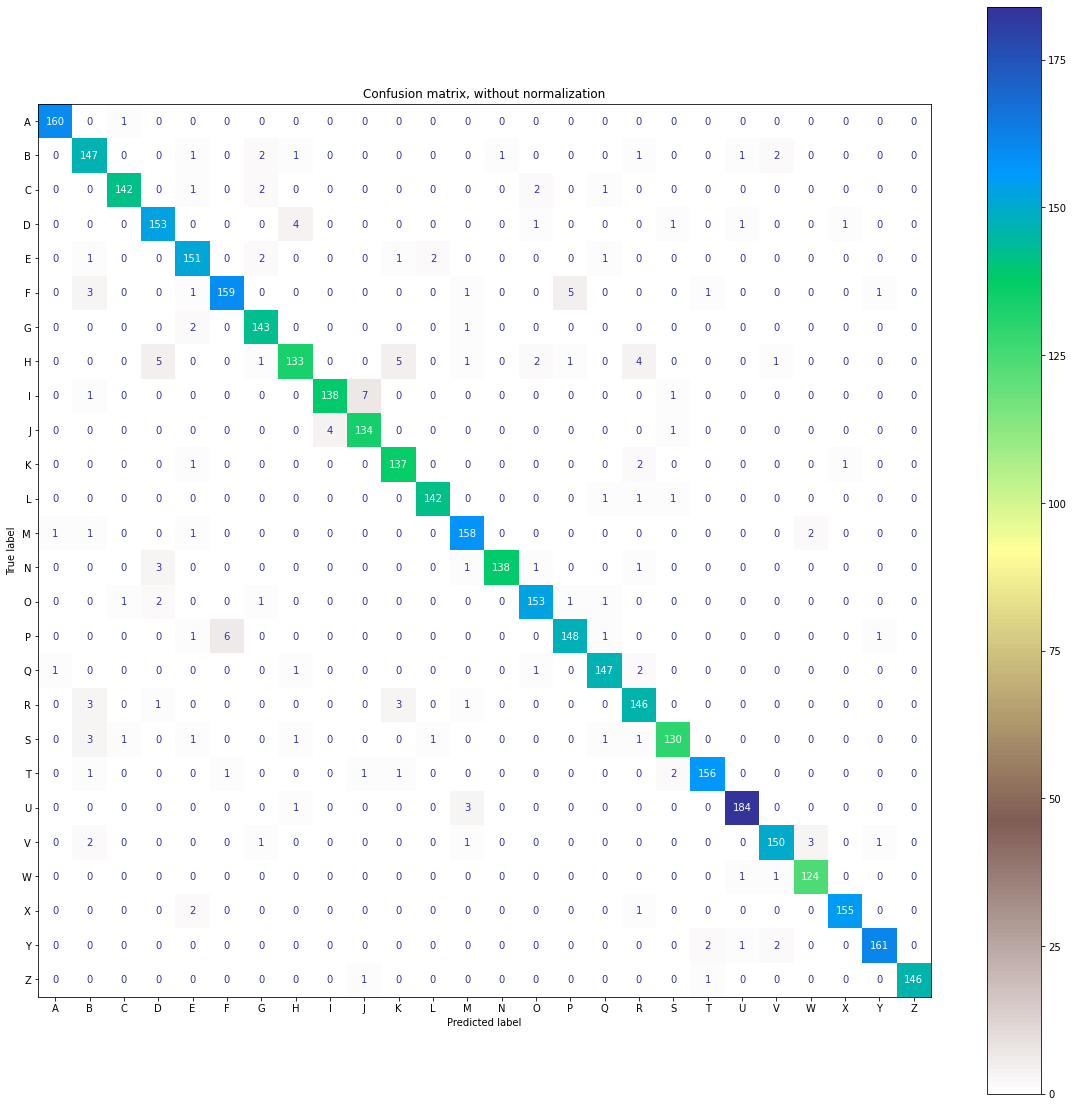

(None,)

In [ ]:
# Plot non-normalized confusion matrix

fig, ax = plt.subplots(figsize=(20, 20))
ax.set(
    ylabel='True label',
    xlabel='Predicted label'
)

titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.terrain_r,
                                 ax=ax,
                                 values_format = '.5g')
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show(), 